In [2]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
from tqdm import tqdm
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica Neue"],
    "font.size": 28})
np.random.seed(0)

In [3]:
n_plot = []
t_plot = []
iter_plot = []

n_max = 1000
n_vec = np.arange(10, n_max + 1, 10, dtype=np.int)

for n in tqdm(n_vec):
    m = n * 3

    v = np.random.randn(n)
    A = np.random.randn(m, n)
    delta = np.random.rand(m)
    b = A @ v + delta
    c = np.random.randn(n)

    x = cp.Variable(n)
    problem = cp.Problem(cp.Minimize(c @ x), [A @ x <= b])
    
    # Solve with Gurobi and simplex method (Method = 0)
    problem.solve(solver=cp.GUROBI, Method=0)
    
    if problem.status != 'optimal':
        print("error not optimal!")

    n_plot.append(n)
    t_plot.append(problem.solver_stats.solve_time)
    iter_plot.append(problem.solver_stats.extra_stats.IterCount)

  0%|          | 0/100 [00:00<?, ?it/s]

Academic license - for non-commercial use only - expires 2021-04-24
Using license file /Users/bstellato/gurobi.lic


100%|██████████| 100/100 [32:47<00:00, 19.67s/it]


In [11]:
theta_time = np.polyfit(n_plot, t_plot, 3)  # 3rd order polynomial
p_time = np.poly1d(theta_time)
theta_time_square = np.polyfit(n_plot, t_plot, 2)  # 2rd order polynomial
p_time_square = np.poly1d(theta_time_square)
theta_iter = np.polyfit(n_plot, iter_plot, 1)  # straight line (1d polynomial)
p_iter = np.poly1d(theta_iter)

x = np.linspace(0, 1000, 100)
y_time = p_time(x)
y_time_square = p_time_square(x)
y_iter = p_iter(x)

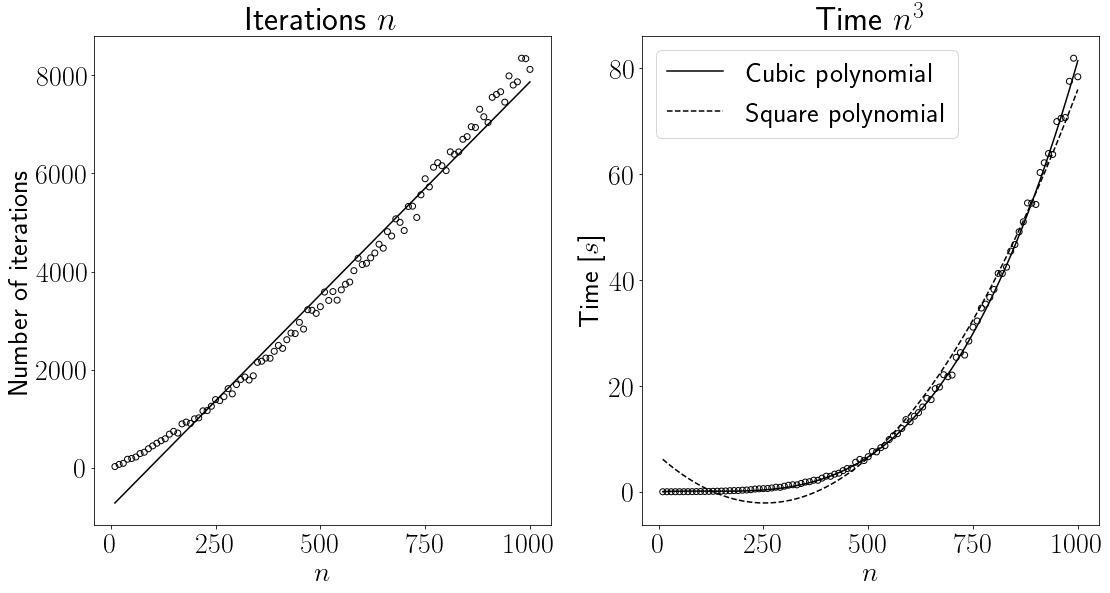

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(18, 9))
ax[0].scatter(n_plot, iter_plot, marker='o', color='k', facecolors='none')
ax[0].plot(n_plot, y_iter, color="k")
ax[0].set_xlabel(r'$n$')
ax[0].set_ylabel(r'Number of iterations')
ax[0].set_title(r'Iterations $n$')
ax[1].scatter(n_plot, t_plot, marker='o', color='k', facecolors='none', )
ax[1].plot(n_plot, y_time, color="k", linestyle="solid", label="Cubic polynomial")
ax[1].plot(n_plot, y_time_square, color="k", linestyle="dashed", label="Square polynomial")
ax[1].set_xlabel(r'$n$')
ax[1].set_ylabel(r'Time [$s$]')
ax[1].set_title(r'Time $n^3$')
ax[1].legend()
plt.savefig("average_simplex.pdf")